# A Practical Tutorial to Simple Linear Regression Using Python

### Machine Learning (ML): ML is an application of Artificial Intelligence (AI) that provides systems the ability to automatically learn themselves and improve from the experience without being explicitly programmed. ML focuses on the development of computer programs that can access data and use it to learn themselves.

### Data Set: A collection of related sets of information that is composed of separate elements but can be manipulated as a unit by a computer.

### Data Visualisation: It is a representation of data or information in a graph, chart, or other visual formats which is helpful to conduct analyses such as predictive analysis which can serve as helpful Visualisation to present.

### Data Cleaning: It is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

### Supervised Learning:  The model is trained using ‘labeled data’. Datasets are said to contain labels that contain both input and output parameters. To simplify – ‘Data is already tagged with the correct answer’.

### Simple Linear Regression: It is a Regression Model that estimates the relationship between the independent variable and the dependent variable using a straight line [y = mx + c], where both the variables should be quantitative.

### Models: Those are output by algorithms and are comprised of model data and a prediction algorithm.

### Training Model: In supervised learning, an ML Algorithm builds a model by examining many examples and attempting to find a model that minimizes loss and improves prediction accuracy.

# The steps involved are:
1. Importing the dataset.

2. Visualising the Data

3. Data Cleaning

4. Build the Model and Train it

5. Make Predictions on Unseen Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data Set:

In [4]:
Data_Set = pd.read_pickle("AgesAndHeights.pkl")

In [6]:
Data_Set

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [8]:
Data_Set.shape

(100, 2)

In [11]:
Data_Set.columns

Index(['Age', 'Height'], dtype='object')

In [13]:
Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Height  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [14]:
Data_Set.info

<bound method DataFrame.info of           Age     Height
0   14.767874  59.627484
1    3.107671  36.146453
2    7.266917  46.912878
3    1.815180  29.125660
4   16.753758  68.170414
..        ...        ...
95   7.323712  46.857505
96   5.591509  39.339990
97   2.625606  32.918925
98   5.519293  40.704154
99  13.117413  55.177407

[100 rows x 2 columns]>

In [16]:
Data_Set.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [17]:
Data_Set.isnull()

,Age,Height
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
95,False,False
96,False,False
97,False,False
98,False,False


<AxesSubplot:>

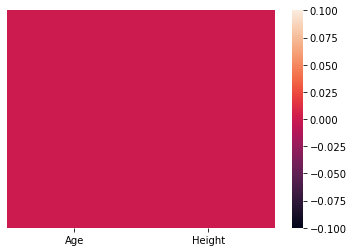

In [22]:
sns.heatmap(Data_Set.isnull(),yticklabels=False, cbar=True)

In [25]:
Data_Set.isnull().sum()

Age       0
Height    0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

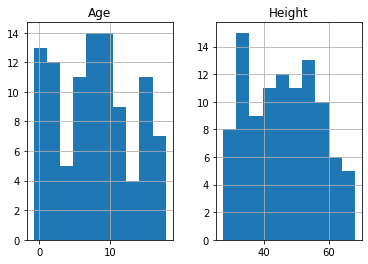

In [26]:
Data_Set.hist()

### This single line of code has a great impact on the way we look at the dataset. We only had a numerical view of the dataset but we can now run this cell to get a histogram view of the dataset which is very helpful. It represents the data present in the individual columns as individual graphs. The Y-axis in both the plots refers to frequency and X-axis represents Age and Height respectively.

# 3. Data Cleaning:
We have to build the model using valid datasets and clean the unaccountable Data. In the above image, we can know that there are a few entries that have an age less than zero which is meaningless. Hence, we need to clean those data to get better accuracy. I  use variable cleaned_data to store the valid age values and display them to the user.

In [64]:
Data_Set["Age"]>0

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Name: Age, Length: 100, dtype: bool

In [65]:
Clean_Data= Data_Set[Data_Set["Age"]>0]

In [66]:
Clean_Data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


### Initially, we had 100 rows but after performing Data Cleaning it’s pretty clear that there are seven rows which we had age < 0 and we have removed them. As a professional, we aren’t supposed to delete the data as we are reducing the data and thereby accuracy of our model gets reduced. To keep it simple I have just removed them.

# Visualize the Cleaned Data: I have now used the cleaned data and visualized it in the form of a graph.

In [67]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='Height'>

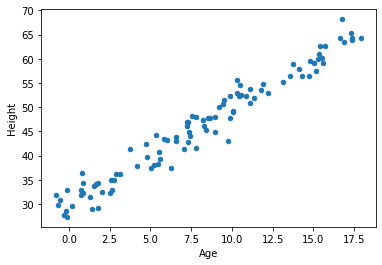

In [68]:
Data_Set.plot(kind="scatter", y='Height', x = 'Age')

### To plot graphs in python I import matplotlib.pyplot library. I represent Age on X-axis and Height on Y-axis. The points in the plot refer to the Raw data.

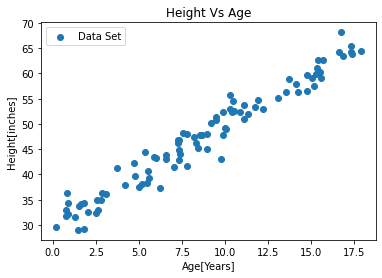

In [69]:
x = Clean_Data['Age']
y= Clean_Data['Height']
plt.scatter(x,y,label='Data Set')
plt.title('Height Vs Age')
plt.xlabel("Age[Years]")
plt.ylabel("Height[inches]")
plt.legend()


In [71]:
Clean_Data.mean()

Age        8.595192
Height    47.164420
dtype: float64

In [74]:
Clean_Data.mean()

Age        8.595192
Height    47.164420
dtype: float64

In [72]:
Clean_Data.mode()

,Age,Height
0,0.195686,29.007696
1,0.751925,29.125660
2,0.768283,29.508468
3,0.812166,31.523500
4,0.859188,31.827347
...,...,...
88,16.859333,64.236387
89,17.327126,64.307845
90,17.343121,64.386212
91,17.393353,65.388501


In [75]:
Clean_Data.median()

Age        8.43333
Height    47.33275
dtype: float64

In [76]:
Clean_Data.var()

Age        24.754880
Height    103.836826
dtype: float64

In [77]:
Clean_Data.std()

Age        4.975428
Height    10.190036
dtype: float64

In [81]:
age = pd.DataFrame(Data_Set["Age"])

hght=pd.DataFrame(Data_Set["Height"])

In [82]:
from sklearn import linear_model as ml

In [83]:
lin = ml.LinearRegression()

In [85]:
model= lin.fit(age,hght)

In [87]:
model

LinearRegression()

In [88]:
model.coef_

array([[1.9855967]])

In [89]:
model.intercept_

array([30.13813668])

In [91]:
model.score(age,hght)

0.9594955233989455

In [92]:
model.summery

AttributeError: 'LinearRegression' object has no attribute 'summery'